# Introduction
This titanic dataset is related to the most notorious shipwrecks in history. This well-known sinking killed 1,502 of the 2,214 passengers and crew. <br>
[DataSet Link](https://www.kaggle.com/competitions/titanic/data)

<br>
<font color = 'blue' >
Content:

1. [Import Libraries](#1)    
1. [Load and Check Data](#2)
    * [Feature type change and droping](#3)
1. [Variable Desciption](#4)
    * [Univariate Variable Analysis](#5)
        * [Categorical Variables](#6)
        * [Numerical Variables](#7)
1. [Otlier Detection](#8)
1. [Missing Value](#9)
    * [Find Missing Value](#10)
    * [Fill Missing Value](#11)
1. [Visulization](#12)
    * [Correlation Between SipSb -- Parch -- Age -- Fare -- Survived](#13)
    * [SibSp -- Survived](#14)
    * [Parch -- Survived](#15)
    * [Pclass -- Survived](#16)
    * [Age -- Survived](#17)
    * [Pclass -- Age -- Survived](#18)
    * [Embarked -- Sex -- Pclass -- Survived](#19)
    * [Embarked -- Sex -- Fare -- Survived](#20)
    * [Fill Missing Value: Age Feature](#21)

<a id = '1'></a>
# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

from collections import Counter
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

<a id = '2'></a>
# 2.  Load and Check Data

In [2]:
trainDf = pd.read_csv("train.csv")
testDf = pd.read_csv("test.csv")
genderSubDf = pd.read_csv("gender_submission.csv")
testPassengerIdDf = testDf["PassengerId"]

In [3]:
trainDf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
trainDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
trainDf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='4'></a>
### 4.Feature type change and droping

In [6]:
trainDf = trainDf.astype({"Parch":'object'})

In [7]:
trainDf.drop("Cabin", axis=1, inplace=True)

In [8]:
testDf.drop("Cabin", axis=1, inplace=True)

In [9]:
trainDf["Survived"].replace({0:"No",1:"Yes"}, inplace=True)

In [10]:
trainDf["Pclass"].replace({1:"1st",2:"2nd",3:"3rd"}, inplace=True)

In [11]:
trainDf["SibSp"].replace({0:"0 Sib",1:"1 Sib",2:"2 Sib",3:"3 Sib",4:"4 Sib",5:"5 Sib",8:"8 Sib"}, inplace=True)

<a id='4'></a>
# 4. Variable Desciption

In [12]:
with open("Titanic.txt","r") as f:
    for line in f:
        print(line, end="")

					TITANIC'S VARIABLES AND EXPLANATION

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass		Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex		Sex	
Age		Age in years	
sibsp		# of siblings / spouses aboard the Titanic	
parch		# of parents / children aboard the Titanic	
ticket		Ticket number	
fare		Passenger fare	
cabin		Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancÃ©s were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [13]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.7+ KB


<table>
  <tr>
    <th>int64</th>
    <th>object</th>
    <th>float64</th>
  </tr>
  <tr>
    <td>PassengerId</td>
    <td>Name</td>
    <td>Age</td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>Sex</td>
    <td>Fare</td>
  </tr>
   <tr>
    <td>Pclass</td>
    <td>Ticket</td>
  </tr>
   <tr>
    <td>SibSp</td>
    <td>Cabin</td>
  </tr>
  <tr>
    <td>Parch</td>
    <td>Embarked</td>
  </tr>
</table>

<a id= '5'></a>
## 5. Univariate Variable Analysis

In [14]:
numerical_features = [i for i in trainDf.columns if trainDf[i].dtype !='O']
categorical_features = [i for i in trainDf.columns if trainDf[i].dtype =='O']

<a id='6'></a>
### 6. Categorical Variables

In [15]:
categorical_features

['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked']

In [16]:
def bar_plot(variable):
    """
        input: variable eg: "sex"
        output: barplot & count value
        
    """
    # Taking feature
    var = trainDf[variable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {} ".format(variable,varValue))
    

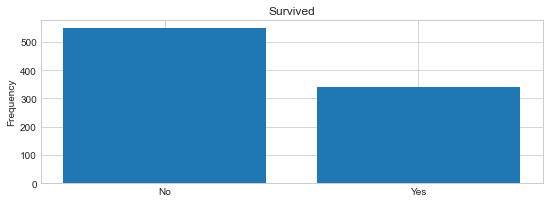

Survived: 
 No     549
Yes    342
Name: Survived, dtype: int64 


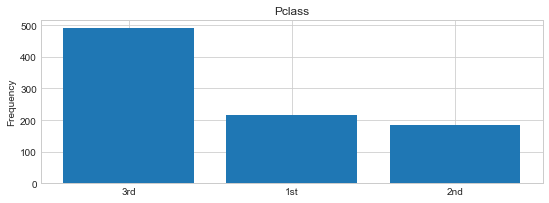

Pclass: 
 3rd    491
1st    216
2nd    184
Name: Pclass, dtype: int64 


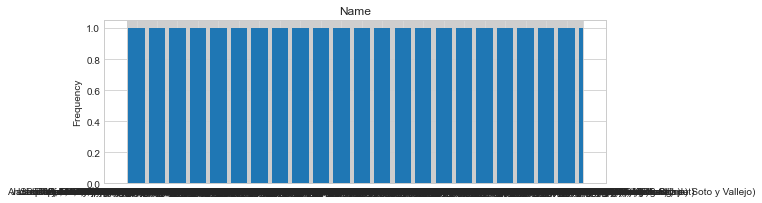

Name: 
 Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 


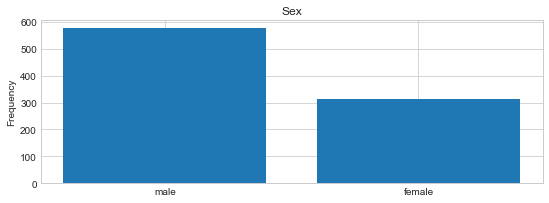

Sex: 
 male      577
female    314
Name: Sex, dtype: int64 


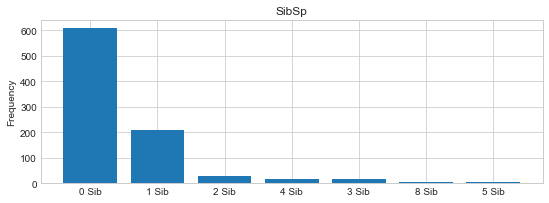

SibSp: 
 0 Sib    608
1 Sib    209
2 Sib     28
4 Sib     18
3 Sib     16
8 Sib      7
5 Sib      5
Name: SibSp, dtype: int64 


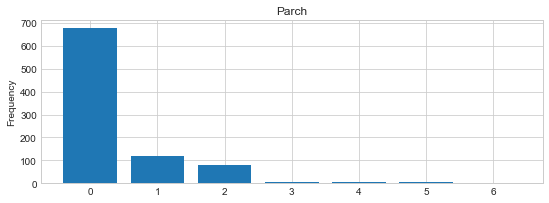

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 


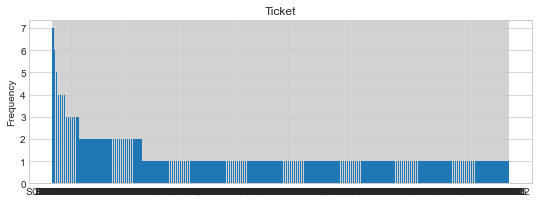

Ticket: 
 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 


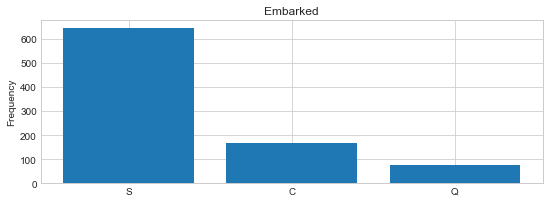

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64 


In [17]:
for i in categorical_features:
    bar_plot(i)

<a id='7'></a>
### 7. Numerical Variables

In [18]:
numerical_features

['PassengerId', 'Age', 'Fare']

In [19]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(trainDf[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequncy")
    plt.title("{} distrubution with hist".format(variable))
    plt.show()

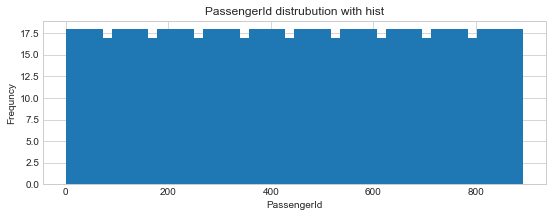

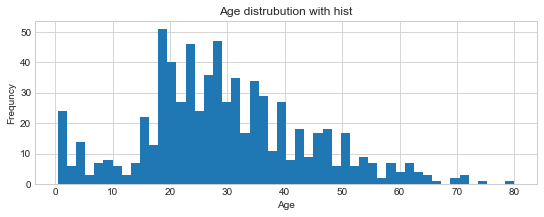

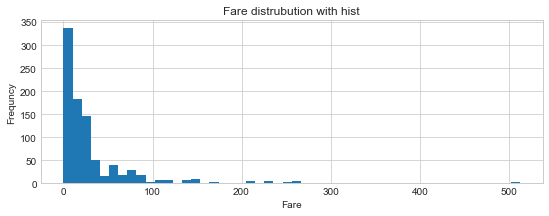

In [20]:
for i in numerical_features:
    plot_hist(i)

# Comment:
1. The price of 500 unit is shown in the chart. Maybe someone made a lump sum payment for their group.
2. The age range is mostly between 20 and 40 years old.

<a id='8'></a>
# 8. Outlier Detection

In [21]:
trainDf["SibSp"].replace({"0 Sib":0,"1 Sib":1,"2 Sib":2,"3 Sib":3,"4 Sib":4,"5 Sib":5,"8 Sib":8}, inplace=True)

In [22]:
def detect_outlier(df,feature):
    outlierIndices = []
    
    for c in feature:
        # First Quartile
        Q1 = np.percentile(df[c],25)
        
        # Third Quartile
        Q3 = np.percentile(df[c],75)
        
        # IQR
        IQR = Q3 - Q1
        
        # Outlier step
        outlier_step = IQR * 1.5
        
        # Detect outlier and thier indices
        outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        
        # Store indices
        outlierIndices.extend(outlier_list_col)
    outlierIndices = Counter(outlierIndices)
    multuple_outliers = list(i for i,v in outlierIndices.items() if v > 2)
    
    return multuple_outliers

In [23]:
trainDf.loc[detect_outlier(trainDf, ["SibSp", "Age","Fare","Parch"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,No,1st,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,S
88,89,Yes,1st,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,S
159,160,No,3rd,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,S
180,181,No,3rd,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,S
201,202,No,3rd,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,S
324,325,No,3rd,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,S
341,342,Yes,1st,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,S
792,793,No,3rd,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,S
846,847,No,3rd,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,S
863,864,No,3rd,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,S


In [24]:
#drop Outliers
trainDf = trainDf.drop(detect_outlier(trainDf, ["SibSp", "Age","Fare","Parch"]), axis = 0).reset_index(drop = True)

<a id='9'></a>
# 9.Missing Value

In [25]:
trainDf_len = len(trainDf)

In [26]:
concatDf = pd.concat([trainDf,testDf], axis=0).reset_index(drop=True)

In [27]:
concatDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,No,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<a id='10'></a>
## 10.Find Missing Value

In [28]:
concatDf.columns[concatDf.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Embarked'], dtype='object')

In [29]:
concatDf.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

<a id='11'></a>
## 11.Fill Missing Value

* Embarked has 2 missing values
* Fare has 1 missing value

In [30]:
concatDf[concatDf["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
60,62,Yes,1st,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
821,830,Yes,1st,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


# Comment:
1. We can fill nan of embarked value according to Fare.

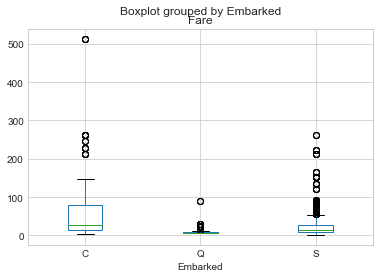

In [31]:
concatDf.boxplot(column="Fare", by="Embarked")
plt.show()

# Comment:
1. The graph shows us that 2 passengers could probably board the Titanic from C and We can fill with C

In [32]:
concatDf["Embarked"] = concatDf["Embarked"].fillna("C")

In [33]:
concatDf[concatDf["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


# Comment
1. We can fill in the Fare with the average of the money they paid according to their Embarked and the Pclass

In [34]:
concatDf["Fare"] = concatDf["Fare"].fillna(np.mean(concatDf[(concatDf["Pclass"] == 3) & (concatDf["Embarked"] == "S")]["Fare"]))

In [35]:
concatDf[concatDf["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


<a id='12'></a>
# Visulization

<a id='13'></a>
## Correlation Between SipSb -- Parch -- Age -- Fare -- Survived

In [36]:
concatDf["Survived"].replace({"No":0,"Yes":1}, inplace=True)

<AxesSubplot:>

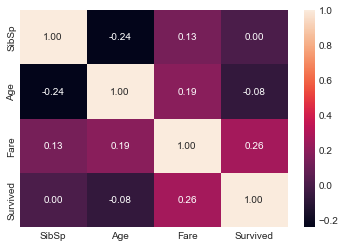

In [37]:
list1 = ["SibSp", "Parch", "Age","Fare","Survived"]
sns.heatmap(concatDf[list1].corr(), annot = True, fmt= ".2f")

## Comment:
1. Fare feature seems to have correlation with survived feature(.26)

<a id='14'></a>
## SibSp -- Survived

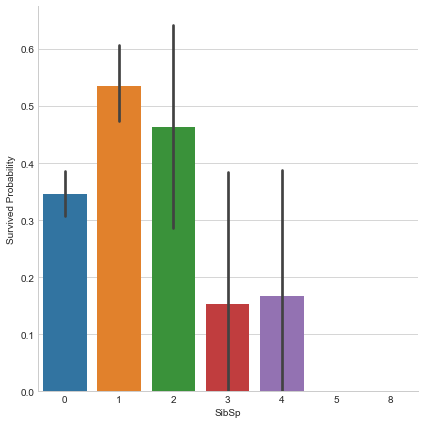

In [38]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = concatDf, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

# Comment:
1. If the family has got more than 2 members they have less chance to survive

<a id='15'></a>
## Parch -- Survived

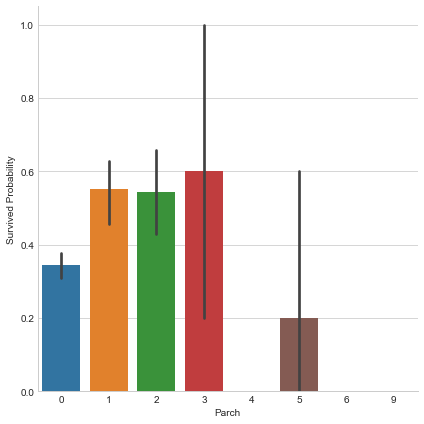

In [39]:
g = sns.factorplot(x = "Parch", y = "Survived", 
                  data = concatDf, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

# Comment:
1. 3 members of parch have got very large std. It means that although it shows us that survived probability equal to 0.6, it's going to be survived between 0.2 and 1.
2. 1 or 2 members of parch have got approximately 0.58 rate of survival.

<a id='16'></a>

## Pclass -- Survived

In [40]:
concatDf["Pclass"].replace({"1st":1,"2nd":2,"3rd":3}, inplace=True)

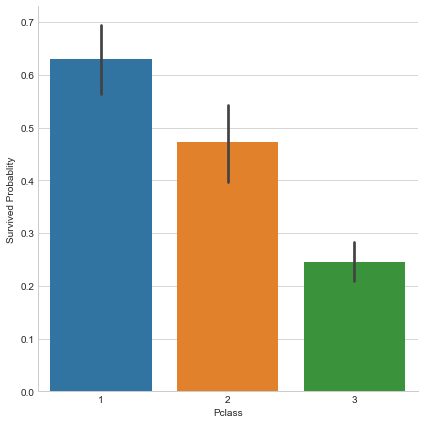

In [41]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = concatDf,kind="bar",size = 6)
g.set_ylabels("Survived Probablity")
plt.show()

# Comment:
1. If someone boards first class, She/He chance to survive more than others.

<a id='17'></a>
## Age -- Survived

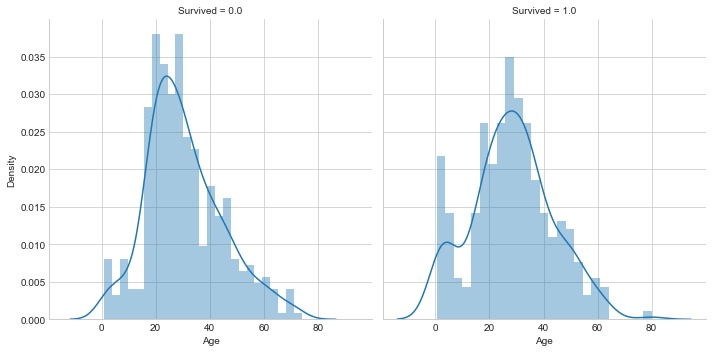

In [42]:
g = sns.FacetGrid(concatDf, col="Survived", size=5)
g.map(sns.distplot, "Age", bins= 25)
plt.show()

# Comment:
1. Children who are between 0 and 10 years old have more chances of survival rate than others.
2. Oldest people survived.
3. Large number of 20 years old did not survived
4. Most passanger are in 15-35 age range

<a id='18'></a>
## Pclass -- Age -- Survived

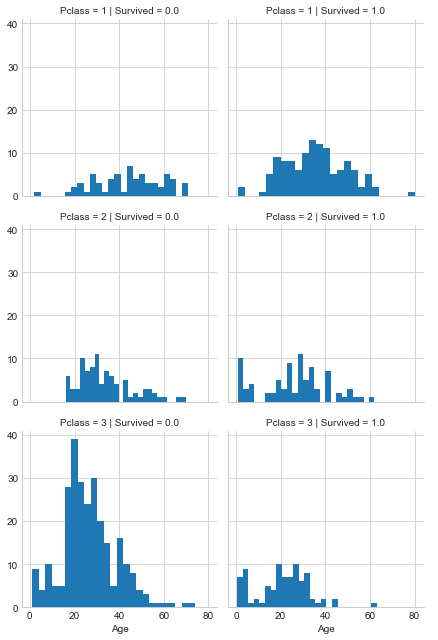

In [43]:
g = sns.FacetGrid(concatDf, col="Survived", row="Pclass",size=3)
g.map(plt.hist,"Age", bins= 25)
g.add_legend()
plt.show()

# Comment:
1. Most of third class passangers did not survive

<a id='19'></a>
## Embarked -- Sex -- Pclass -- Survived

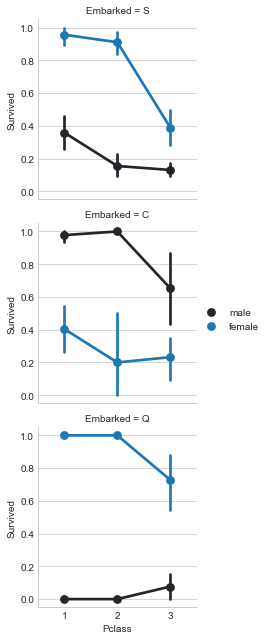

In [44]:
g = sns.FacetGrid(concatDf, row= "Embarked", size = 3)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

# Comment:
1. Female passangers have much better survival rate than male passangers.
2. Pclass and Embarked have got relationship with each others
3. Male passangers have better survival rate in pclass in C
4. Q embarked; If you are female and your class is 1 or 2 you are most possibility survive.

<a id='20'></a>
## Embarked -- Sex -- Fare -- Survived

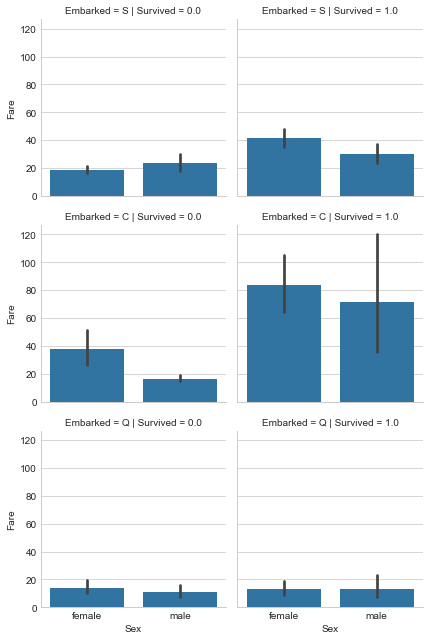

In [45]:
g = sns.FacetGrid(concatDf, row= "Embarked", col= "Survived",
                 size = 3)
g.map(sns.barplot, "Sex","Fare")
g.add_legend()
plt.show()

# Comment:
1. If you paid more money than others you might chance to survive more than others
2. If you board from Q you will most possibility to chance to survive.

<a id='21'></a>
## Fill Missing Value: Age Feature

In [46]:
concatDf[concatDf["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


# Comment:
1. Age feature has got 256 nan values

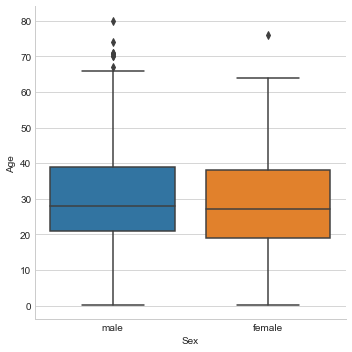

In [47]:
# Firstly We can compare sex and age variable with each other.
sns.factorplot(x = "Sex", y= "Age", data = concatDf, kind= "box")
plt.show()

# Comment:
1. We can see that the 2 features have got nearly the same median values. It means that We can not decide to compare to fill nan values.

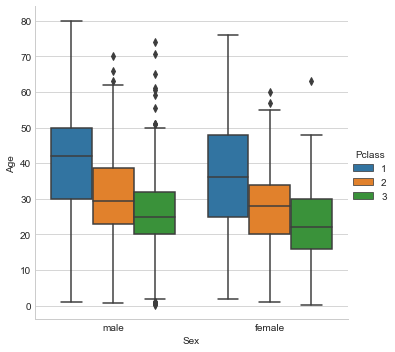

In [48]:
sns.factorplot(x = "Sex", y= "Age", hue= "Pclass", data = concatDf, kind= "box")
plt.show()

# Comment: 
1. If someone is in the third class median value is approximately 25.
2. If someone is in the second class median value is approximately 30.
3. If someone is in the first class median value is approximately 40.
5. To sum up: The younger passengers are in the third class.

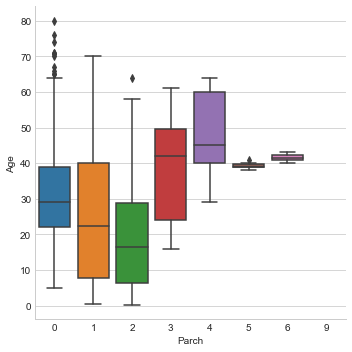

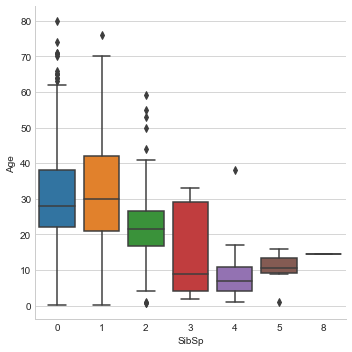

In [49]:
sns.factorplot(x = "Parch", y= "Age", data = concatDf, kind= "box")
sns.factorplot(x = "SibSp", y= "Age", data = concatDf, kind= "box")
plt.show()

In [50]:
concatDf = concatDf.astype({"Parch":'int64'})

In [51]:
concatDf["Sex"] = [1 if i == "male" else 0 for i in concatDf["Sex"]]

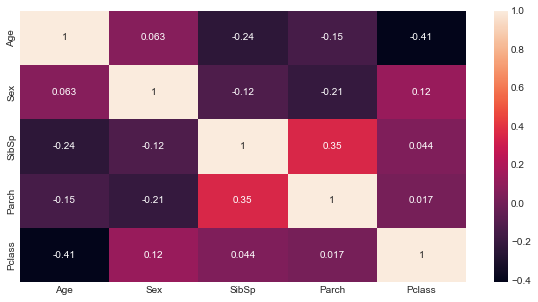

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(concatDf[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot= True)
plt.show()

# Comment:
1. Heatmap shows us that age and sex features do not correlate with each other.
2. On the other hand, age feature correlate with SibSp, Parch and Pclass

In [53]:
# We take indices of nan values of the age feature.
indices_nan_age = list(concatDf["Age"][concatDf["Age"].isnull()].index)
indices_nan_age

[5,
 17,
 19,
 26,
 27,
 28,
 30,
 31,
 35,
 41,
 44,
 45,
 46,
 47,
 54,
 63,
 64,
 75,
 76,
 81,
 86,
 93,
 99,
 105,
 107,
 119,
 124,
 126,
 138,
 152,
 156,
 163,
 165,
 173,
 177,
 181,
 182,
 192,
 194,
 209,
 218,
 224,
 230,
 235,
 236,
 245,
 251,
 255,
 259,
 265,
 269,
 272,
 279,
 290,
 293,
 295,
 296,
 298,
 299,
 301,
 324,
 328,
 329,
 340,
 344,
 347,
 351,
 352,
 357,
 360,
 361,
 368,
 377,
 381,
 402,
 403,
 404,
 406,
 408,
 413,
 418,
 421,
 424,
 437,
 444,
 447,
 450,
 452,
 457,
 459,
 461,
 463,
 468,
 474,
 478,
 483,
 488,
 490,
 495,
 500,
 504,
 510,
 515,
 517,
 520,
 524,
 526,
 531,
 540,
 545,
 550,
 553,
 556,
 557,
 561,
 566,
 571,
 577,
 582,
 586,
 589,
 591,
 594,
 595,
 604,
 605,
 606,
 622,
 626,
 632,
 636,
 641,
 643,
 646,
 649,
 660,
 662,
 667,
 673,
 685,
 690,
 702,
 704,
 711,
 720,
 725,
 731,
 732,
 733,
 753,
 759,
 761,
 766,
 769,
 771,
 776,
 783,
 785,
 807,
 817,
 818,
 820,
 824,
 829,
 831,
 840,
 850,
 858,
 868,
 878,
 891

In [54]:
for i in indices_nan_age:
    age_pred = concatDf["Age"][(concatDf["SibSp"]== concatDf.iloc[i]["SibSp"]) & 
                               (concatDf["Parch"]== concatDf.iloc[i]["Parch"]) & 
                               (concatDf["Pclass"]== concatDf.iloc[i]["Pclass"])].median()
    age_median = concatDf["Age"].median()
    if not np.isnan(age_pred):
        concatDf["Age"].iloc[i] = age_pred
    else:
        concatDf["Age"].iloc[i] = age_median

In [55]:
concatDf[concatDf["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


# Comment:
1. We fill all age nan values

In [56]:
concatDf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",1,25.0,0,0,A.5. 3236,8.0500,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1297,1308,NaN,3,"Ware, Mr. Frederick",1,25.0,0,0,359309,8.0500,S


In [57]:
concatDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   int64  
 5   Age          1299 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Ticket       1299 non-null   object 
 9   Fare         1299 non-null   float64
 10  Embarked     1299 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 111.8+ KB


In [58]:
concatDf.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

# Conclusion:
1. First of all, We handled with dataset and made some changes
2. We separeted dataset between categorical and numerical
3. If the dataset includes outlier values We detected these.
4. We did some visualization studies to better understand the dataset.. 
5. Finding the missing value and filling this properly
    * We separated the age value because there were some problems with that.
6. We correlated values with each other and made decisions for filling or dropping.
7. We fill the nan value of age with the median values of SibSp, Parch, Pclass.
8. Survived feature has got nan value and it comes from test data set. We did not fill in these values because We will use in the machine-learning process

### This study was done by Mehmet Ali YILMAZ.